<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Knn_testing_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do K-NN clasification.

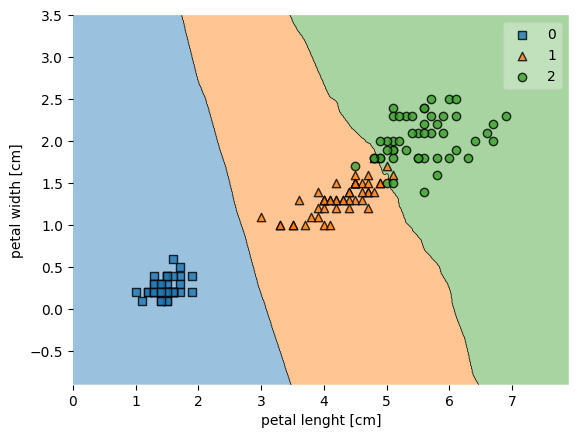

In [2]:
X, y = load_iris(return_X_y=True)
knn_model = KNeighborsClassifier(n_neighbors=30, p=2)
knn_model.fit(X[:,2:], y)
plot_decision_regions(X[:,2:], y, knn_model)
plt.xlabel('petal lenght [cm]')
plt.ylabel('petal width [cm]')
plt.show()

In [3]:
y_pred = knn_model.predict(X[:,2:])
print("Number of mislabeled points out of a total %d points : %d"  % (X.shape[0], (y != y_pred).sum()))
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y,y_pred)))


Number of mislabeled points out of a total 150 points : 6
Accuracy score from sklearn library:= 96.00 


Let's check the accuracy for a range of K 2-50

In [22]:
k_range = range(2,50)
scores ={}
scores_list =[]
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=1)
  k_nn.fit(X, y)
  y_pred = k_nn.predict(X)
  scores[k]=metrics.accuracy_score(y,y_pred)
  scores_list.append(metrics.accuracy_score(y,y_pred))



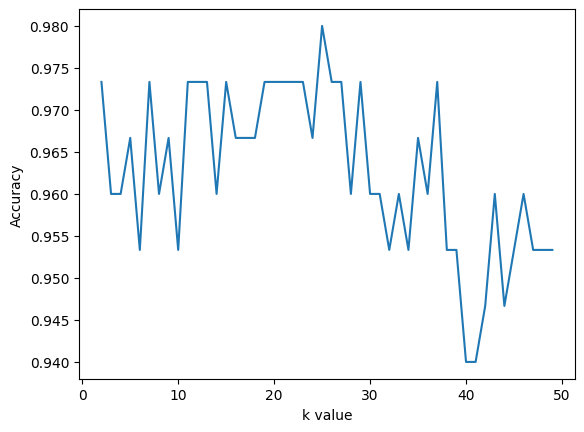

In [23]:
plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting


In [6]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [8]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std=(X_train -mu)/sigma
X_test_std=(X_test -mu)/sigma
X_valid_std=(X_valid -mu)/sigma

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

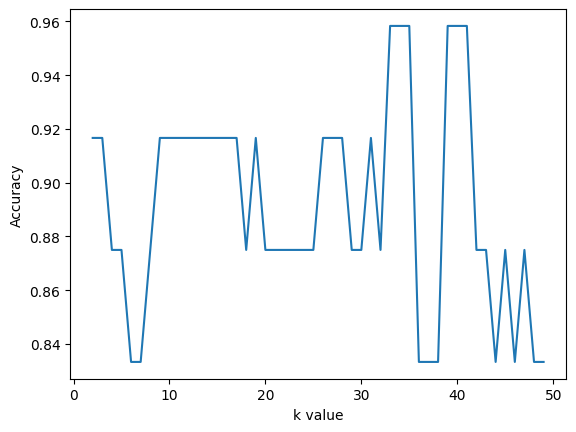

a= 31
best k= 33
Accuracy score from sklearn library:= 83.33 


In [11]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train, y_train)
  y_pred = k_nn.predict(X_valid)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

With STANDARTISATION STD

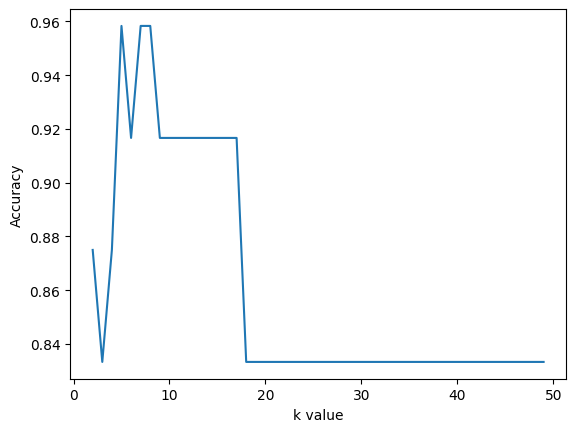

a= 3
best k= 5
Accuracy score from sklearn library:= 96.67 


In [12]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train_std, y_train)
  y_pred = k_nn.predict(X_valid_std)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train_std, y_train)
y_pred = k_nn.predict(X_test_std)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

MIN-MAX scaling

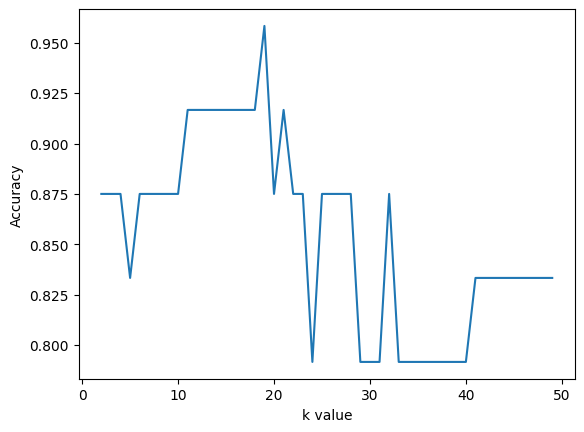

a= 17
best k= 19
Accuracy score from sklearn library:= 93.33 


In [59]:
k_range = range(2,50)
scores ={}
scores_list =[]
P_val=3
for k in k_range:
  k_nn = KNeighborsClassifier(n_neighbors=k, p=P_val)
  k_nn.fit(X_train_mm, y_train)
  y_pred = k_nn.predict(X_valid_mm)
  scores[k]=metrics.accuracy_score(y_valid,y_pred)
  scores_list.append(metrics.accuracy_score(y_valid,y_pred))

plt.plot(k_range, scores_list)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
a=np.argmax(scores_list)
print('a=', a)
best_k=k_range[a]
print('best k=', best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k, p=P_val)
k_nn.fit(X_train_mm, y_train)
y_pred = k_nn.predict(X_test_mm)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

In [63]:
y_pred = k_nn.predict([[5.1, 3.5, 1.4, 0.2],[6. , 2.9, 4.5, 1.5],[5.9, 3. , 5.1, 1.8]])
print(y_pred)

X_1=scaler.transform([[5.1, 3.5, 1.4, 0.2],[6. , 2.9, 4.5, 1.5],[5.9, 3. , 5.1, 1.8]])
y_pred = k_nn.predict(X_1)
print(y_pred)

[2 2 2]
[0 1 2]


In [49]:
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectPercentile
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

train_ind, valid_ind = train_test_split(np.arange(X.shape[0]),
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y)

pipe = make_pipeline(MinMaxScaler(),
                     SelectPercentile(percentile=50),
                     KNeighborsClassifier())

params = {'kneighborsclassifier__n_neighbors': np.arange(2,11),
          'kneighborsclassifier__p': [1, 2],
          'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

split = PredefinedHoldoutSplit(valid_indices=valid_ind)

grid = GridSearchCV(pipe,
                    param_grid=params,
                    cv=split)

grid.fit(X, y)

GridSearchCV(cv=<mlxtend.evaluate.holdout.PredefinedHoldoutSplit object at 0x7d7267f16fe0>,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('selectpercentile',
                                        SelectPercentile(percentile=50)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [ ]:
grid.cv_results_

In [44]:
pipe.fit(X, y)
pipe[:-1].transform(X).shape

(150, 2)

In [50]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}


In [51]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f%%' % (clf.score(X_test, y_test)*100))

Test accuracy: 96.67%


In [64]:
y_pred = clf.predict([[5.1, 3.5, 1.4, 0.2],[6. , 2.9, 4.5, 1.5],[5.9, 3. , 5.1, 1.8]])
print(y_pred)

[0 1 2]
